# KMeans Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv("data.csv", delimiter=",",encoding="ISO-8859-1")#delimiter(how to separate teh data),encoding=used to read the textual data
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [3]:
data.info()#info of all the available columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Description of the dataset. By default it will give the description of numeric data points

In [5]:
data.describe().T#.T for transponse

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


Description of non-numeric data

In [6]:
data.describe(exclude=['int64','float64'])

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


Check for null values

In [7]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [8]:
data.shape

(541909, 8)

Delete the missing records

In [9]:
data.dropna(inplace=True)#dropna-remove all the null values from computation
#inplace=True reflects the changes in the data itself else we'll have to manually assign data=data.dropna()

In [10]:
data.shape

(406829, 8)

OBSERVATION: we can clearly see that earlier there were 541909 rows but for now there are 406829 rows

In [11]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


No more null values are present. So now we can proceed


Cheaking of whether negative values are present in Quality and unit price

In [12]:
data[data['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
data[data['UnitPrice']<0].shape

(0, 8)

In [14]:
data.drop(data[data['Quantity']<0].index,inplace=True)

In [15]:
data.shape

(397924, 8)

Calculate the total amount or monetary value

Part of data preparation cycle

In [16]:
data['Sales']=data['Quantity']*data['UnitPrice']
new_data=data.groupby('CustomerID')['Sales'].sum().reset_index()
new_data
#we're trying to create the new data by total sales done for every customerID
#helps to determine the spending power

,CustomerID,Sales
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4334,18280.0,180.60
4335,18281.0,80.82
4336,18282.0,178.05
4337,18283.0,2094.88


In [17]:
type(new_data)

pandas.core.frame.DataFrame

Calculating the number of transactions of each customer

In [18]:
nums_trans=data.groupby('CustomerID')['InvoiceNo'].count().reset_index()
nums_trans

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4334,18280.0,10
4335,18281.0,7
4336,18282.0,12
4337,18283.0,756


In [19]:
type(nums_trans)

pandas.core.frame.DataFrame

Calculate the last transaction.

In [20]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])

In [21]:
data['InvoiceDate']

,InvoiceDate
0,2010-12-01 08:26:00
1,2010-12-01 08:26:00
2,2010-12-01 08:26:00
3,2010-12-01 08:26:00
4,2010-12-01 08:26:00
...,...
541904,2011-12-09 12:50:00
541905,2011-12-09 12:50:00
541906,2011-12-09 12:50:00
541907,2011-12-09 12:50:00


In [22]:
data['Last Transaction']=(data['InvoiceDate'].max()-data['InvoiceDate']).dt.days

In [23]:
data['Last Transaction']#giving only days

,Last Transaction
0,373
1,373
2,373
3,373
4,373
...,...
541904,0
541905,0
541906,0
541907,0


In [24]:
data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Last Transaction
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30,373
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,373
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,373
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,373


In [25]:
lt=data.groupby(['CustomerID','Country'])['Last Transaction'].max().reset_index()

In [26]:
lt

,CustomerID,Country,Last Transaction
0,12346.0,United Kingdom,325
1,12347.0,Iceland,366
2,12348.0,Finland,357
3,12349.0,Italy,18
4,12350.0,Norway,309
...,...,...,...
4342,18280.0,United Kingdom,277
4343,18281.0,United Kingdom,180
4344,18282.0,United Kingdom,125
4345,18283.0,United Kingdom,336


In [27]:
#performing inner join on datasets
merge_table=pd.merge(lt,nums_trans,how='inner',on='CustomerID')#table names ,how=join_type,on which row
#merging the tables
new_df=pd.merge(merge_table,new_data,how='inner',on='CustomerID')
new_df

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12346.0,United Kingdom,325,1,77183.60
1,12347.0,Iceland,366,182,4310.00
2,12348.0,Finland,357,31,1797.24
3,12349.0,Italy,18,73,1757.55
4,12350.0,Norway,309,17,334.40
...,...,...,...,...,...
4342,18280.0,United Kingdom,277,10,180.60
4343,18281.0,United Kingdom,180,7,80.82
4344,18282.0,United Kingdom,125,12,178.05
4345,18283.0,United Kingdom,336,756,2094.88


**Data preparation part is completed.**

#Exploratory Data Analysis
Removal of outliers

In [28]:
new_df.columns

Index(['CustomerID', 'Country', 'Last Transaction', 'InvoiceNo', 'Sales'], dtype='object')

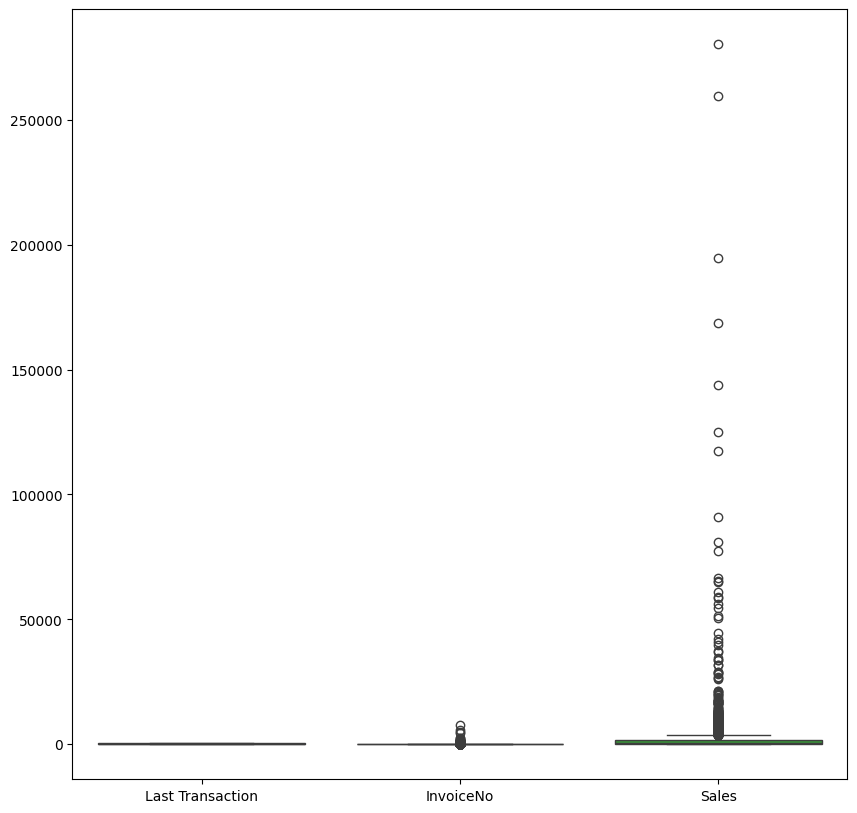

In [29]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df[['Last Transaction', 'InvoiceNo', 'Sales']])
plt.show()

In [30]:
IQR=new_df['Sales'].quantile(0.75)-new_df['Sales'].quantile(0.25)
lower_limit=new_df['Sales'].quantile(0.25)-1.5*IQR
upper_limit=new_df['Sales'].quantile(0.75)+1.5*IQR
new_df_iqr=new_df[(new_df['Sales']<upper_limit)&(new_df['Sales']>lower_limit)]#mask part
new_df_iqr.shape

(3923, 5)

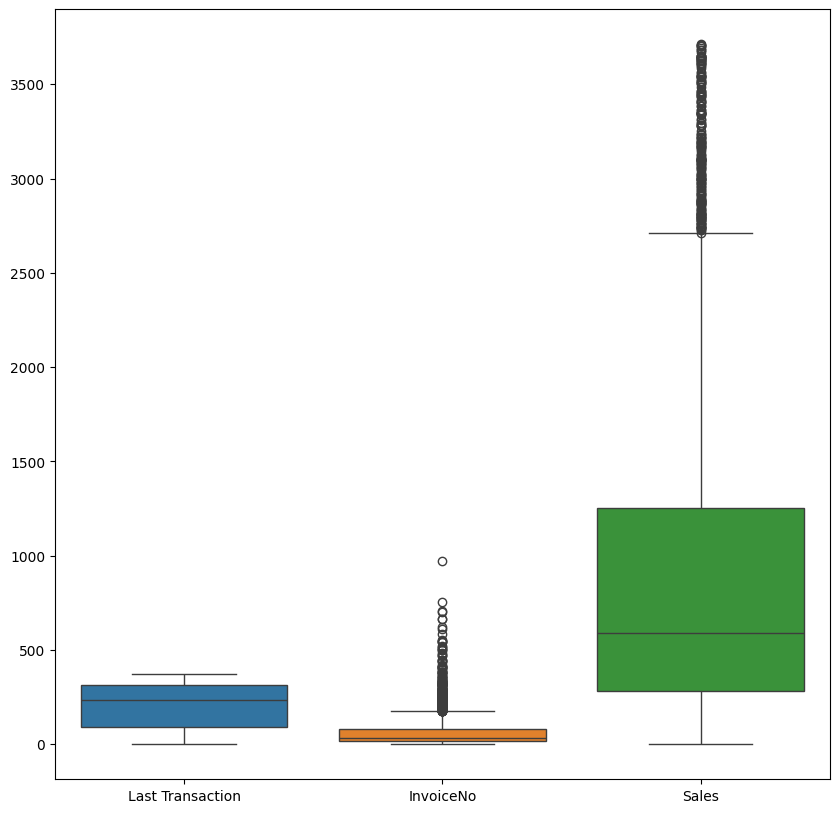

In [31]:
plt.figure(figsize=(10,10))
sns.boxplot(data=new_df_iqr[['Last Transaction', 'InvoiceNo', 'Sales']])
plt.show()

In [32]:
new_df_iqr.reset_index(drop=True,inplace=True)
new_df_iqr

,CustomerID,Country,Last Transaction,InvoiceNo,Sales
0,12348.0,Finland,357,31,1797.24
1,12349.0,Italy,18,73,1757.55
2,12350.0,Norway,309,17,334.40
3,12352.0,Norway,296,85,2506.04
4,12353.0,Bahrain,203,4,89.00
...,...,...,...,...,...
3918,18280.0,United Kingdom,277,10,180.60
3919,18281.0,United Kingdom,180,7,80.82
3920,18282.0,United Kingdom,125,12,178.05
3921,18283.0,United Kingdom,336,756,2094.88


#Visualization of correlation matrix using heatmap

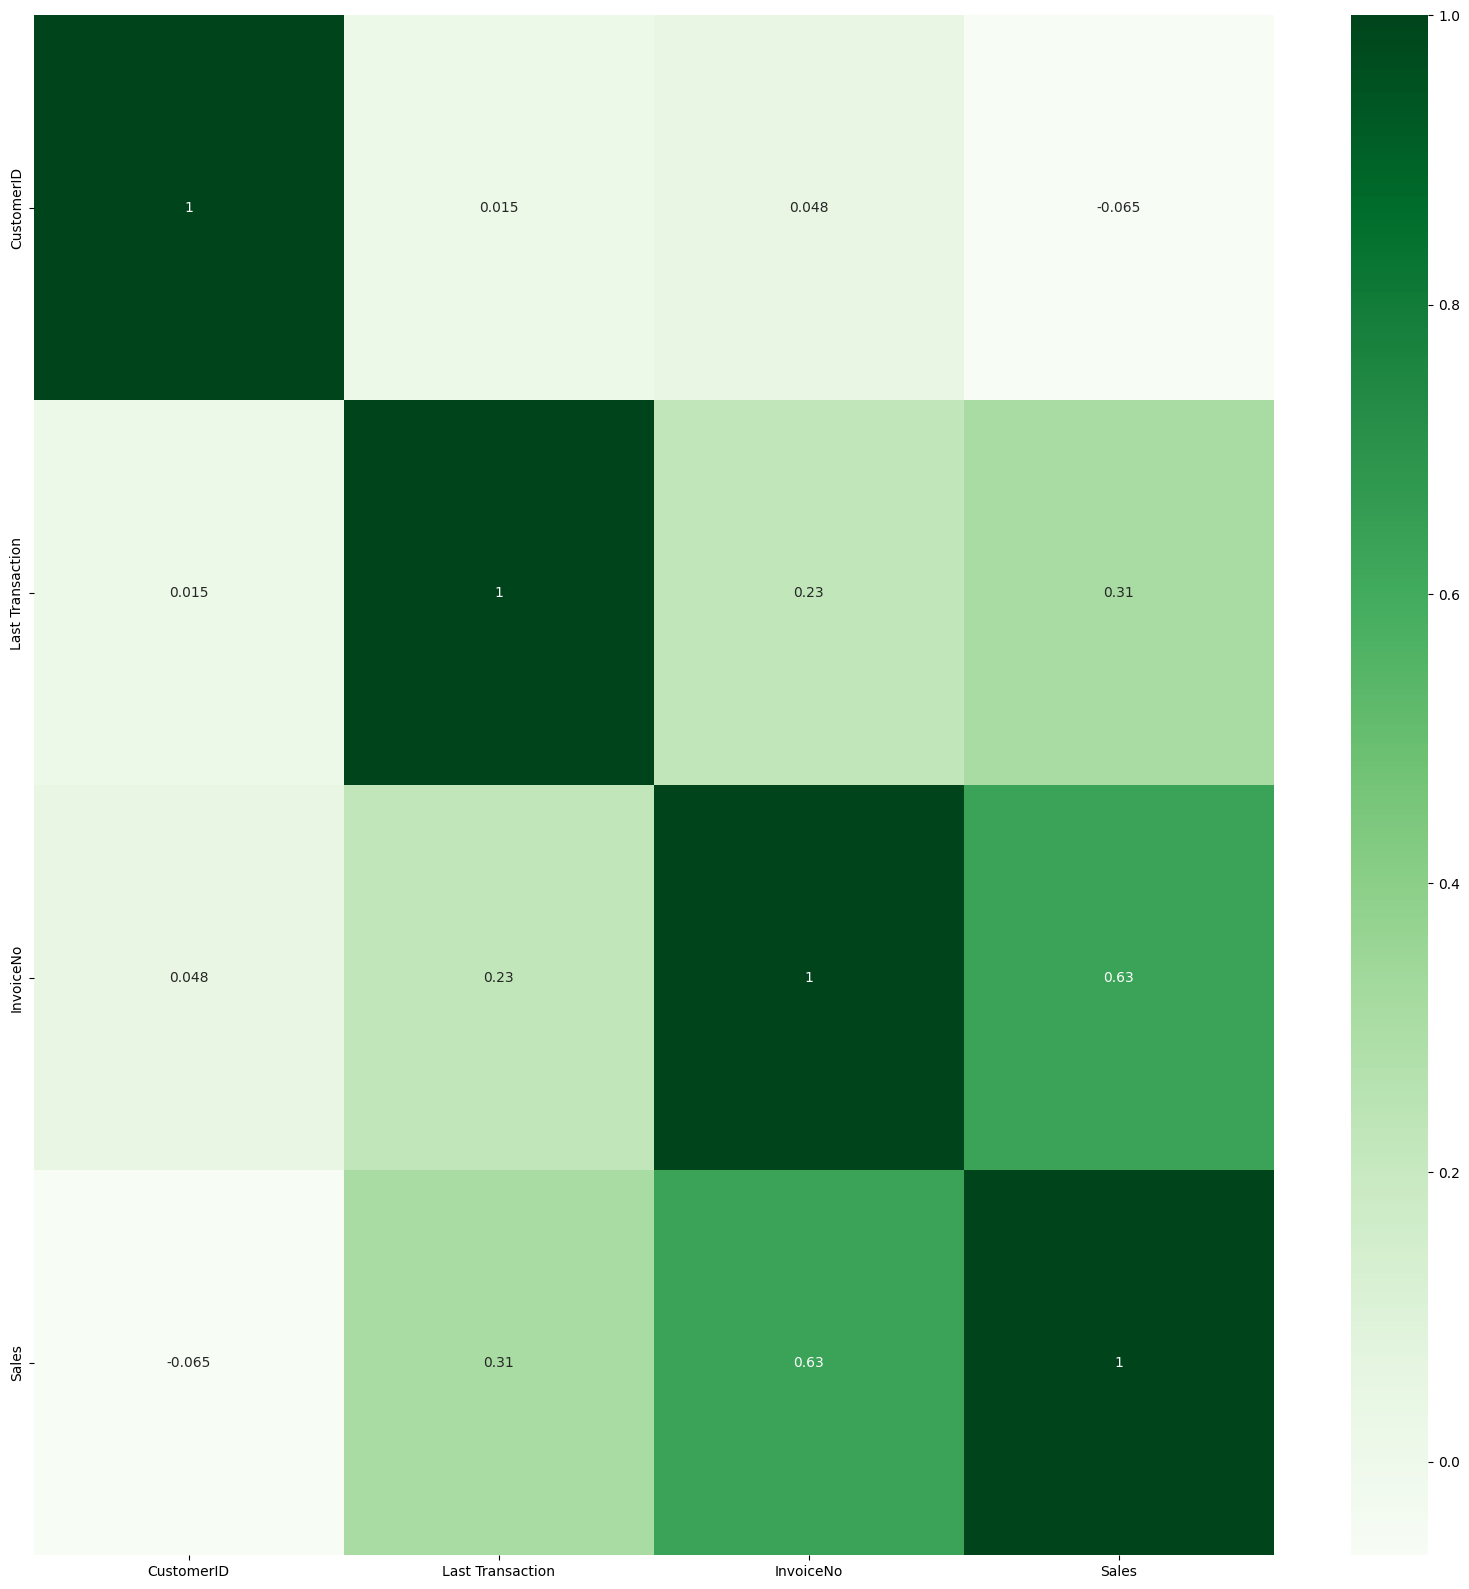

In [33]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df_iqr.drop('Country', axis=1).corr(),cmap="Greens",annot=True)#cmap="Greens"
plt.show()

#Normalization of dataset

1. Min-Max Scaling (Normalization)

Range: [0, 1] (or a custom range)

Use case: When features need to be bounded or when the algorithm is sensitive to magnitudes (e.g., neural networks).

Downside: Sensitive to outliers.

2. Standardization (Z-score Normalization)

Range: Unbounded, mean = 0, standard deviation = 1

Use case: When data has outliers or when features have Gaussian-like distribution.


In [34]:
from sklearn.preprocessing import MinMaxScaler

In [35]:
new2_df=new_df_iqr[['Last Transaction','InvoiceNo','Sales']]
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(new2_df)
scaled_df=pd.DataFrame(scaled_df)
scaled_df.columns=['last Transaction','InvoiceNo','Sales']
scaled_df['Country']=new_df_iqr['Country']
scaled_df

,last Transaction,InvoiceNo,Sales,Country
0,0.957105,0.030960,0.484200,Finland
1,0.048257,0.074303,0.473507,Italy
2,0.828418,0.016512,0.090092,Norway
3,0.793566,0.086687,0.675160,Norway
4,0.544236,0.003096,0.023978,Bahrain
...,...,...,...,...
3918,0.742627,0.009288,0.048656,United Kingdom
3919,0.482574,0.006192,0.021774,United Kingdom
3920,0.335121,0.011352,0.047969,United Kingdom
3921,0.900804,0.779154,0.564388,United Kingdom


#1-K means Clustering-Plot graph using Elbow Method

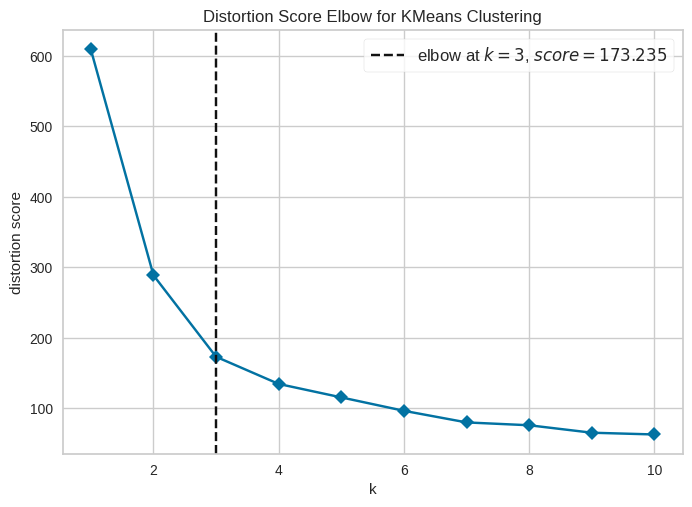

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
df_k=scaled_df.drop(columns=['Country'],axis=1)
#ELBOW method for k means
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
#k is the ange of number of clusters
visualizer=KElbowVisualizer(model,k=(1,11),timings=False)#timings make sure to run the elbow mwthod. I used timing and my accuracy decreased because the elbow mwthod didn't ran successfully due to that
visualizer.fit(df_k)
visualizer.show()

OBSERVATION:

🔵 Blue Line – Distortion Score
Y-axis (left): distortion_score

This shows the within-cluster sum of squares (WCSS) or inertia, which measures how tightly the clusters are formed.

As
𝑘
k increases (more clusters), the distortion score decreases—clusters are tighter.

However, after a certain point, the improvement becomes marginal.

The "elbow" is at
𝑘
=
3
k=3, where the distortion score drops significantly before leveling off.
This suggests that 3 clusters is optimal.

🟢 Green Line – Fit Time
Y-axis (right, green): fit time (seconds)

This line shows how long the algorithm took to compute the clustering for each
𝑘
k.

It fluctuates with no clear trend—often small variations due to randomness or computational load.

Note: Fit time is much smaller in magnitude than the distortion score, so it is plotted on a separate y-axis (right-hand side).



In [37]:
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df_k)
df_k['Clusters']=y_predicted
df_k

,last Transaction,InvoiceNo,Sales,Clusters
0,0.957105,0.030960,0.484200,1
1,0.048257,0.074303,0.473507,2
2,0.828418,0.016512,0.090092,0
3,0.793566,0.086687,0.675160,1
4,0.544236,0.003096,0.023978,0
...,...,...,...,...
3918,0.742627,0.009288,0.048656,0
3919,0.482574,0.006192,0.021774,2
3920,0.335121,0.011352,0.047969,2
3921,0.900804,0.779154,0.564388,1


In [38]:
km.cluster_centers_#finding center(centroid) of each cluster

array([[0.77317137, 0.04263809, 0.15710448],
       [0.80074265, 0.15760362, 0.63323941],
       [0.21717256, 0.04061798, 0.14981966]])

# Model Evaluation


In [39]:
km.labels_

array([1, 2, 0, ..., 2, 1, 1], dtype=int32)

In [40]:
from sklearn.metrics import silhouette_samples,silhouette_score
score=silhouette_score(df_k,km.labels_,metric='euclidean')#df_k=final dataset,km.labels_=giving us the clusters(done using euclidean distance)
print(score)

0.7831645460077202


**OBSERVATION:** Score is near to 1 resulting to a good cluster

In [41]:
from sklearn.metrics import silhouette_samples,silhouette_score
score=silhouette_score(df_k,km.labels_,metric='manhattan')#df_k=final dataset,km.labels_=giving us the clusters(done using manhattan distance)
print(score)

0.8073067486348571


# Agglomarative clustering

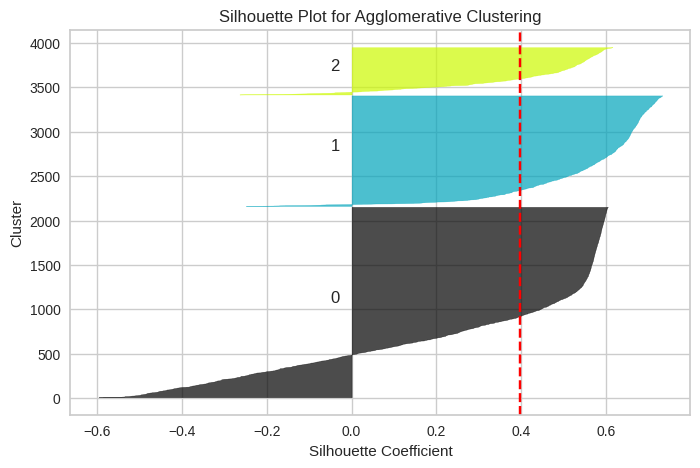

In [42]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Prepare features
X = df_k.drop('Clusters', axis=1)

# Fit Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=3)
labels = model.fit_predict(X)

# Compute silhouette scores
silhouette_vals = silhouette_samples(X, labels)
avg_score = silhouette_score(X, labels)

# Plot silhouette scores
fig, ax = plt.subplots(figsize=(8, 5))
y_lower = 10

for i in np.unique(labels):
    ith_vals = silhouette_vals[labels == i]
    ith_vals.sort()

    size = ith_vals.shape[0]
    y_upper = y_lower + size

    color = plt.cm.nipy_spectral(float(i) / 3)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_vals, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size, str(i))
    y_lower = y_upper + 10

ax.axvline(avg_score, color="red", linestyle="--")
ax.set_xlabel("Silhouette Coefficient")
ax.set_ylabel("Cluster")
ax.set_title("Silhouette Plot for Agglomerative Clustering")
plt.show()


In [43]:
from sklearn.cluster import AgglomerativeClustering
hierarchial= AgglomerativeClustering(n_clusters=3)
y_predicted=hierarchial.fit_predict(df_k)
df_k['Clusters']=y_predicted
df_k
#hierarchial.fit(df_k)

,last Transaction,InvoiceNo,Sales,Clusters
0,0.957105,0.030960,0.484200,2
1,0.048257,0.074303,0.473507,1
2,0.828418,0.016512,0.090092,0
3,0.793566,0.086687,0.675160,2
4,0.544236,0.003096,0.023978,0
...,...,...,...,...
3918,0.742627,0.009288,0.048656,0
3919,0.482574,0.006192,0.021774,1
3920,0.335121,0.011352,0.047969,1
3921,0.900804,0.779154,0.564388,2


Silhautte score for Agglomarative clustering

In [44]:
from sklearn.metrics import silhouette_samples,silhouette_score
# Feature matrix (without cluster label)
X = df_k.drop('Clusters', axis=1)

# Labels (cluster assignments)
labels = df_k['Clusters']

# Silhouette score
score = silhouette_score(X, labels, metric='manhattan')
score

np.float64(0.45775406174989836)

In [45]:
from sklearn.metrics import silhouette_samples,silhouette_score
# Feature matrix (without cluster label)
X = df_k.drop('Clusters', axis=1)

# Labels (cluster assignments)
labels = df_k['Clusters']

# Silhouette score
score = silhouette_score(X, labels, metric='euclidean')
score

np.float64(0.48536182335138495)

**OBSERVATION: **

# Silhouette Scores Comparison:
Algorithm	Silhouette Score	Interpretation
KMeans	0.78-- Excellent clustering (well-separated)
Agglomerative	0.4576 (Manhattan)	--Moderate clustering (some overlap)

# What This Means:
KMeans gave a much higher silhouette score, which indicates:

Clusters are more compact and well-separated.

The centroid-based nature of KMeans may be a better fit for your data's structure.

Agglomerative Clustering (especially with Manhattan distance) gave a lower score:

There might be less separation between clusters.

Or hierarchical merging may not align with natural clusters in your dataset.

# Why This Happens:
KMeans optimizes clusters globally around centroids.

Agglomerative is greedy and bottom-up — might merge points prematurely.

Manhattan metric works well in some cases, but Euclidean often fits better for compact clusters.

# 3-DBSCAN(Density Based Spatial Clustering of Application with noise)

In [46]:
from sklearn.cluster import DBSCAN

In [47]:
dbscan=DBSCAN(eps=0.2,min_samples=4)
y_predicted_dbscan=dbscan.fit_predict(df_k)
df_k['Clsuter_dbscan']=y_predicted_dbscan
df_k

,last Transaction,InvoiceNo,Sales,Clusters,Clsuter_dbscan
0,0.957105,0.030960,0.484200,2,0
1,0.048257,0.074303,0.473507,1,1
2,0.828418,0.016512,0.090092,0,2
3,0.793566,0.086687,0.675160,2,0
4,0.544236,0.003096,0.023978,0,2
...,...,...,...,...,...
3918,0.742627,0.009288,0.048656,0,2
3919,0.482574,0.006192,0.021774,1,1
3920,0.335121,0.011352,0.047969,1,1
3921,0.900804,0.779154,0.564388,2,0


In [48]:
from sklearn.metrics import silhouette_samples,silhouette_score
score_dbscan=silhouette_score(df_k,dbscan.labels_,metric='euclidean')
score_dbscan

np.float64(0.8259819671334179)

OBSERVATION: score is close to +1 means it belongs to good cluster

# 🔹 DBSCAN (0.848)
Found the best separation among clusters.
Excels at discovering arbitrary-shaped clusters and ignoring noise.
Likely captured real structure of your data better than both centroid and hierarchical methods.

# 🔹 KMeans (0.78)
Still very strong — clusters are compact and well-separated.
Assumes clusters are spherical and of similar size.
Good choice when you expect balanced, round clusters.

# 🔹 Agglomerative (0.4576, Manhattan)
Shows moderate performance.
The Manhattan distance may not match your data’s true geometry.
Merges clusters greedily, possibly combining dissimilar groups too early.

